In [1]:
a = [{'time': 0.78, 'rms_db': -61.46, 'pitch_hz': 798.76}, {'time': 0.81, 'rms_db': -61.64, 'pitch_hz': 579.98}, {'time': 0.84, 'rms_db': -62.13, 'pitch_hz': 579.71}, {'time': 0.87, 'rms_db': -63.45, 'pitch_hz': 471.93}]

In [6]:
for i in range(len(a)):
    # logging.info(f"pitch rms list of: {i}")
    # current_start = float(a[i]["time"])
    # next_start = float(a[i+1]["time"])
    # print("------------")

    # print("c",current_start)
    # print("n", next_start)
    # # print("s", start)
    print(a[i:3])

[{'time': 0.78, 'rms_db': -61.46, 'pitch_hz': 798.76}, {'time': 0.81, 'rms_db': -61.64, 'pitch_hz': 579.98}, {'time': 0.84, 'rms_db': -62.13, 'pitch_hz': 579.71}]
[{'time': 0.81, 'rms_db': -61.64, 'pitch_hz': 579.98}, {'time': 0.84, 'rms_db': -62.13, 'pitch_hz': 579.71}]
[{'time': 0.84, 'rms_db': -62.13, 'pitch_hz': 579.71}]
[]


In [2]:
import openai
import os
from langchain.vectorstores import Qdrant
from langchain.embeddings import HuggingFaceBgeEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings.openai import OpenAIEmbeddings
from dotenv import load_dotenv

In [5]:
load_dotenv()

openai.api_key = os.getenv("OPENAI_KEY")

loader = PyPDFLoader("data/150-WBE_500-TDS.pdf")
documents = loader.load()
print(len(documents))
# print(documents[0].text)

2


In [7]:
documents[0].page_content

'GENERAL PRODUCT INFORMATION\nColors: All standard and custom colors\nSolids Volume: 40%\nV.O.C.: 1.32 lbs per gallon catalyzed\nPot-life: 1-hour @ 70° F\nCure Schedule: 70° F @ 50% R.H. \n To touch: 6- Hours\n To re-coat: 8-10 Hours Minimum\n18-24 Hours Maximum\n Foot Traffic: 18-Hours\n Heavy Traffic: 72-Hours\nReducer: Not recommended\n Application Temp: 60ºF(15.6ºC)  - 90ºF(32.2ºC)\nEnvironment: For Interior Use Only  \nShelf Life: 12-months factory sealed  \nGENERAL PRODUCT PERFORMANCE\nTEST TYPE TEST METHOD RESULT\nChemical Resistance 50 MEK         \nDouble Rubs\n> 70% Gloss\nRetention\nHardness ASTMD 3363 HB\nAbrasion Resistance ASTMD-4060 40 mg loss\nFlexibility \n1/4” cylindrical mandrel ASTMD 522 Pass\nImpact Resistance ASTMD 2794 105 lb. direct\nCoefficient of Friction ASTMD-2047 > 0.6  /  pass\nUSES:\n » Primer for Resinous Flooring\n » Industrial Flooring\n » Large square footage\n » Economical 2-Coat Floor\nCoating\nADVANTAGES:\n » Long  working time\n » Easy to use 1:2 

In [8]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
splitted_docs = text_splitter.split_documents(documents)

texts = [doc.page_content for doc in splitted_docs]

In [9]:
texts

['GENERAL PRODUCT INFORMATION\nColors: All standard and custom colors\nSolids Volume: 40%\nV.O.C.: 1.32 lbs per gallon catalyzed\nPot-life: 1-hour @ 70° F\nCure Schedule: 70° F @ 50% R.H. \n To touch: 6- Hours\n To re-coat: 8-10 Hours Minimum\n18-24 Hours Maximum\n Foot Traffic: 18-Hours\n Heavy Traffic: 72-Hours\nReducer: Not recommended\n Application Temp: 60ºF(15.6ºC)  - 90ºF(32.2ºC)\nEnvironment: For Interior Use Only  \nShelf Life: 12-months factory sealed  \nGENERAL PRODUCT PERFORMANCE',
 'GENERAL PRODUCT PERFORMANCE\nTEST TYPE TEST METHOD RESULT\nChemical Resistance 50 MEK         \nDouble Rubs\n> 70% Gloss\nRetention\nHardness ASTMD 3363 HB\nAbrasion Resistance ASTMD-4060 40 mg loss\nFlexibility \n1/4” cylindrical mandrel ASTMD 522 Pass\nImpact Resistance ASTMD 2794 105 lb. direct\nCoefficient of Friction ASTMD-2047 > 0.6  /  pass\nUSES:\n » Primer for Resinous Flooring\n » Industrial Flooring\n » Large square footage\n » Economical 2-Coat Floor\nCoating\nADVANTAGES:\n » Long  

In [11]:
# Generate embeddings for the texts
embeddings_model = OpenAIEmbeddings(openai_api_key=os.getenv("OPENAI_KEY"))
embeddings = embeddings_model.embed_documents(texts)


In [12]:
url = "http://localhost:6333"
qdrant = Qdrant.from_texts(
    texts=texts,
    embedding=embeddings_model,
    url=url,
    prefer_grpc=False,
    collection_name="vector_db"
)

print("Vector DB Successfully Created!")

Vector DB Successfully Created!


In [13]:
import openai
import os
from qdrant_client import QdrantClient
from langchain.vectorstores import Qdrant
from langchain.embeddings import OpenAIEmbeddings
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI
from dotenv import load_dotenv

In [14]:
load_dotenv()

openai.api_key = os.getenv("OPENAI_KEY")

url = "http://localhost:6333"

client = QdrantClient(
    url=url, prefer_grpc=False
)

In [15]:
print("##############")

collection_name = "vector_db"
embeddings_model = OpenAIEmbeddings(openai_api_key=os.getenv("OPENAI_KEY"))
db = Qdrant(client=client, embeddings=embeddings_model, collection_name="vector_db")

llm = OpenAI(openai_api_key=os.getenv("OPENAI_KEY"))


##############


C:\Users\hp\AppData\Local\Temp\ipykernel_10436\1957597326.py:5: LangChainDeprecationWarning: The class `Qdrant` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-qdrant package and should be used instead. To use it run `pip install -U :class:`~langchain-qdrant` and import as `from :class:`~langchain_qdrant import Qdrant``.
  db = Qdrant(client=client, embeddings=embeddings_model, collection_name="vector_db")
C:\Users\hp\AppData\Local\Temp\ipykernel_10436\1957597326.py:7: LangChainDeprecationWarning: The class `OpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAI``.
  llm = OpenAI(openai_api_key=os.getenv("OPENAI_KEY"))


In [16]:
retrieval_qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever()
)

def ask_question(question):
    result = retrieval_qa({"query": question})
    return result['result']

In [19]:
question = "could you please tell about maintainence"
answer = ask_question(question)
print("Question:", question)
print("Answer:", answer)

Question: could you please tell about maintainence
Answer:  According to the given context, maintenance for wear surface products involves frequent and thorough cleaning with a neutral PH cleaner, and the frequency of washing will vary depending on usage type, traffic, and age. It is also important to note that the product should not be applied to new slabs < 28-days old or concrete < 3500 PSI compression strength, and the ambient temperature should be between 60ºF and 90ºF with a relative humidity below 85%. It is not recommended for immersion service and should not be applied when the dew point is within 5ºF of the ambient temperature. Mock-ups and field test areas are recommended for validation of performance and appearance, and it is important to thoroughly read all Material Safety Data Sheets prior to use. Surface preparation is also crucial, and mechanical grinding or blasting is recommended to achieve the appropriate surface profile.


In [2]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from typing_extensions import List, TypedDict

# Load and chunk contents of the blog
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [5]:
# Index chunks
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-large", api_key=os.getenv("OPENAI_KEY"))
from langchain_core.vectorstores import InMemoryVectorStore

vector_store = InMemoryVectorStore(embeddings)
_ = vector_store.add_documents(documents=all_splits)

In [6]:
from langchain_core.tools import tool


@tool(response_format="content_and_artifact")
def retrieve(query: str):
    """Retrieve information related to a query."""
    retrieved_docs = vector_store.similarity_search(query, k=2)
    serialized = "\n\n".join(
        (f"Source: {doc.metadata}\n" f"Content: {doc.page_content}")
        for doc in retrieved_docs
    )
    return serialized, retrieved_docs

In [8]:
from langchain_core.messages import SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, MessagesState, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition


# Step 1: Generate an AIMessage that may include a tool-call to be sent.
def query_or_respond(state: MessagesState):
    """Generate tool call for retrieval or respond."""
    llm_with_tools = llm.bind_tools([retrieve])
    response = llm_with_tools.invoke(state["messages"])
    # MessagesState appends messages to state instead of overwriting
    return {"messages": [response]}

In [9]:
# Step 2: Execute the retrieval.
tools = ToolNode([retrieve])


# Step 3: Generate a response using the retrieved content.
def generate(state: MessagesState):
    """Generate answer."""
    # Get generated ToolMessages
    recent_tool_messages = []
    for message in reversed(state["messages"]):
        if message.type == "tool":
            recent_tool_messages.append(message)
        else:
            break
    tool_messages = recent_tool_messages[::-1]

    # Format into prompt
    docs_content = "\n\n".join(doc.content for doc in tool_messages)
    system_message_content = (
        "You are an assistant for question-answering tasks. "
        "Use the following pieces of retrieved context to answer "
        "the question. If you don't know the answer, say that you "
        "don't know. Use three sentences maximum and keep the "
        "answer concise."
        "\n\n"
        f"{docs_content}"
    )
    conversation_messages = [
        message
        for message in state["messages"]
        if message.type in ("human", "system")
        or (message.type == "ai" and not message.tool_calls)
    ]
    prompt = [SystemMessage(system_message_content)] + conversation_messages

    # Run
    response = llm.invoke(prompt)
    return {"messages": [response]}

In [10]:

# Build graph
graph_builder = StateGraph(MessagesState)

graph_builder.add_node(query_or_respond)
graph_builder.add_node(tools)
graph_builder.add_node(generate)

graph_builder.set_entry_point("query_or_respond")
graph_builder.add_conditional_edges(
    "query_or_respond",
    tools_condition,
    {END: END, "tools": "tools"},
)
graph_builder.add_edge("tools", "generate")
graph_builder.add_edge("generate", END)

memory = MemorySaver()
graph = graph_builder.compile(checkpointer=memory)

In [15]:
from langchain.chat_models import init_chat_model

llm = init_chat_model("gpt-4o-mini", model_provider="openai", api_key=os.getenv("OPENAI_KEY"))

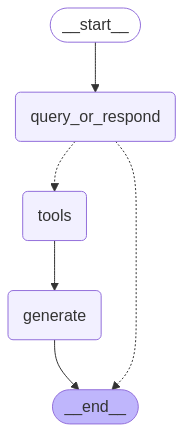

In [11]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
# Specify an ID for the thread
config = {"configurable": {"thread_id": "abc123"}}

In [16]:
input_message = "Hello"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Hello
================================== Ai Message ==================================

Hi there! How can I assist you today?


In [17]:
input_message = "What is Task Decomposition?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_mWUKlHZNxnNRsq7ePsl17W3j)
 Call ID: call_mWUKlHZNxnNRsq7ePsl17W3j
  Args:
    query: Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smaller and simpler steps. CoT transforms b

In [18]:
input_message = "Can you look up some common ways of doing it?"

for step in graph.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    step["messages"][-1].pretty_print()

================================ Human Message =================================

Can you look up some common ways of doing it?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_mSdqhR8GziX9whSnqN70KWnb)
 Call ID: call_mSdqhR8GziX9whSnqN70KWnb
  Args:
    query: common methods for task decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposition#
Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks. The model is instructed to “think step by step” to utilize more test-time computation to decompose hard tasks into smalle

In [19]:
chat_history = graph.get_state(config).values["messages"]
for message in chat_history:
    message.pretty_print()

================================ Human Message =================================

Hello
================================ Human Message =================================

Hello
================================== Ai Message ==================================

Hi there! How can I assist you today?
================================ Human Message =================================

What is Task Decomposition?
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_mWUKlHZNxnNRsq7ePsl17W3j)
 Call ID: call_mWUKlHZNxnNRsq7ePsl17W3j
  Args:
    query: Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Fig. 1. Overview of a LLM-powered autonomous agent system.
Component One: Planning#
A complicated task usually involves many steps. An agent needs to know what they are and plan ahead.
Task Decomposi

In [20]:
from langgraph.prebuilt import create_react_agent

agent_executor = create_react_agent(llm, [retrieve], checkpointer=memory)

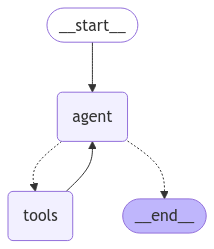

In [21]:
display(Image(agent_executor.get_graph().draw_mermaid_png()))

In [22]:
config = {"configurable": {"thread_id": "def234"}}

input_message = (
    "What is the standard method for Task Decomposition?\n\n"
    "Once you get the answer, look up common extensions of that method."
)

for event in agent_executor.stream(
    {"messages": [{"role": "user", "content": input_message}]},
    stream_mode="values",
    config=config,
):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the standard method for Task Decomposition?

Once you get the answer, look up common extensions of that method.
================================== Ai Message ==================================
Tool Calls:
  retrieve (call_kI0xdPkcEb367sUa3zWYPtQz)
 Call ID: call_kI0xdPkcEb367sUa3zWYPtQz
  Args:
    query: standard method for Task Decomposition
================================= Tool Message =================================
Name: retrieve

Source: {'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}
Content: Tree of Thoughts (Yao et al. 2023) extends CoT by exploring multiple reasoning possibilities at each step. It first decomposes the problem into multiple thought steps and generates multiple thoughts per step, creating a tree structure. The search process can be BFS (breadth-first search) or DFS (depth-first search) with each state evaluated by a classifier (via a prompt) or majori

In [23]:
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

# Define a new graph
workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    response = llm.invoke(state["messages"])
    # Update message history with response:
    return {"messages": response}


# Define the (single) node in the graph
workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

# Add memory
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [24]:
config = {"configurable": {"thread_id": "abc123"}}

In [25]:
query = "Hi! I'm Bob."

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()  # output contains all messages in state

================================== Ai Message ==================================

Hi Bob! How can I assist you today?


In [26]:
query = "What's my name?"

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Your name is Bob. How can I help you today, Bob?


In [27]:
query = "What's my name?"
config = {"configurable": {"thread_id": "abc234"}}

input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

I'm sorry, but I don't know your name. If you'd like, you can share it with me!


In [28]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "Answer in {language}."),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

runnable = prompt | llm

In [29]:
from typing import Sequence

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from typing_extensions import Annotated, TypedDict


class State(TypedDict):
    messages: Annotated[Sequence[BaseMessage], add_messages]
    language: str


workflow = StateGraph(state_schema=State)


def call_model(state: State):
    response = runnable.invoke(state)
    # Update message history with response:
    return {"messages": [response]}


workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [30]:
config = {"configurable": {"thread_id": "abc345"}}

input_dict = {
    "messages": [HumanMessage("Hi, I'm Bob.")],
    "language": "Spanish",
}
output = app.invoke(input_dict, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

¡Hola, Bob! ¿Cómo estás?


In [31]:
state = app.get_state(config).values

print(f'Language: {state["language"]}')
for message in state["messages"]:
    message.pretty_print()

Language: Spanish
================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

¡Hola, Bob! ¿Cómo estás?


In [32]:
from langchain_core.messages import HumanMessage

_ = app.update_state(config, {"messages": [HumanMessage("Test")]})

In [33]:
state = app.get_state(config).values

print(f'Language: {state["language"]}')
for message in state["messages"]:
    message.pretty_print()

Language: Spanish
================================ Human Message =================================

Hi, I'm Bob.
================================== Ai Message ==================================

¡Hola, Bob! ¿Cómo estás?
================================ Human Message =================================

Test


In [34]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o-mini", api_key=os.getenv("OPENAI_KEY"))

In [35]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        SystemMessage(
            content="You are a helpful assistant. Answer all questions to the best of your ability."
        ),
        MessagesPlaceholder(variable_name="messages"),
    ]
)

chain = prompt | model

ai_msg = chain.invoke(
    {
        "messages": [
            HumanMessage(
                content="Translate from English to French: I love programming."
            ),
            AIMessage(content="J'adore la programmation."),
            HumanMessage(content="What did you just say?"),
        ],
    }
)
print(ai_msg.content)

I translated "I love programming" into French as "J'adore la programmation."


In [36]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability."
    )
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = model.invoke(messages)
    return {"messages": response}


# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [37]:
app.invoke(
    {"messages": [HumanMessage(content="Translate to French: I love programming.")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: I love programming.', additional_kwargs={}, response_metadata={}, id='63da30c2-16f1-4a4c-9306-ccc624a7cd15'),
  AIMessage(content="J'aime programmer.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 35, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b8bc95a0ac', 'id': 'chatcmpl-BDT5XGINmdwiMqFpy5Wp0r9loqSLM', 'finish_reason': 'stop', 'logprobs': None}, id='run-d5e1984d-9412-40e6-93ee-877dd20a5d7e-0', usage_metadata={'input_tokens': 35, 'output_tokens': 5, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [38]:
app.invoke(
    {"messages": [HumanMessage(content="What did I just ask you?")]},
    config={"configurable": {"thread_id": "1"}},
)

{'messages': [HumanMessage(content='Translate to French: I love programming.', additional_kwargs={}, response_metadata={}, id='63da30c2-16f1-4a4c-9306-ccc624a7cd15'),
  AIMessage(content="J'aime programmer.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 35, 'total_tokens': 40, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b8bc95a0ac', 'id': 'chatcmpl-BDT5XGINmdwiMqFpy5Wp0r9loqSLM', 'finish_reason': 'stop', 'logprobs': None}, id='run-d5e1984d-9412-40e6-93ee-877dd20a5d7e-0', usage_metadata={'input_tokens': 35, 'output_tokens': 5, 'total_tokens': 40, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='What did I just as

In [39]:
from langchain_core.messages import HumanMessage, RemoveMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph

workflow = StateGraph(state_schema=MessagesState)


# Define the function that calls the model
def call_model(state: MessagesState):
    system_prompt = (
        "You are a helpful assistant. "
        "Answer all questions to the best of your ability. "
        "The provided chat history includes a summary of the earlier conversation."
    )
    system_message = SystemMessage(content=system_prompt)
    message_history = state["messages"][:-1]  # exclude the most recent user input
    # Summarize the messages if the chat history reaches a certain size
    if len(message_history) >= 4:
        last_human_message = state["messages"][-1]
        # Invoke the model to generate conversation summary
        summary_prompt = (
            "Distill the above chat messages into a single summary message. "
            "Include as many specific details as you can."
        )
        summary_message = model.invoke(
            message_history + [HumanMessage(content=summary_prompt)]
        )

        # Delete messages that we no longer want to show up
        delete_messages = [RemoveMessage(id=m.id) for m in state["messages"]]
        # Re-add user message
        human_message = HumanMessage(content=last_human_message.content)
        # Call the model with summary & response
        response = model.invoke([system_message, summary_message, human_message])
        message_updates = [summary_message, human_message, response] + delete_messages
    else:
        message_updates = model.invoke([system_message] + state["messages"])

    return {"messages": message_updates}


# Define the node and edge
workflow.add_node("model", call_model)
workflow.add_edge(START, "model")

# Add simple in-memory checkpointer
memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

In [41]:
demo_ephemeral_chat_history = [
    HumanMessage(content="Hey there! I'm Nemo."),
    AIMessage(content="Hello!"),
    HumanMessage(content="How are you today?"),
    AIMessage(content="Fine thanks!"),
]

In [42]:
app.invoke(
    {
        "messages": demo_ephemeral_chat_history
        + [HumanMessage("What did I say my name was?")]
    },
    config={"configurable": {"thread_id": "4"}},
)

{'messages': [AIMessage(content='Nemo greeted me and asked how I was doing, to which I responded that I was fine.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 60, 'total_tokens': 81, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_b8bc95a0ac', 'id': 'chatcmpl-BDT7DNZHEeGrzXDa6tFgdWSLDcIGs', 'finish_reason': 'stop', 'logprobs': None}, id='run-9da35345-46a9-49b9-97bc-6de17d7af15a-0', usage_metadata={'input_tokens': 60, 'output_tokens': 21, 'total_tokens': 81, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
  HumanMessage(content='What did I say my name was?', additional_kwargs={}, response_metadata={}, id='ca2461d3-a7a8-4714-82c6-d95a105